In [1]:
import numpy as np
import pandas as pd
import sys
import os

classes_path = os.path.abspath(r"D:\Repositories\PhD\src\classes")
src_path = os.path.abspath(r"D:\Repositories\PhD\src\functions")
sys.path.append(src_path)
sys.path.append(classes_path)
print(sys.path)

['d:\\Repositories\\PhD\\notebooks\\automated_modeling', 'd:\\Anaconda\\envs\\ai-env-torch\\python310.zip', 'd:\\Anaconda\\envs\\ai-env-torch\\DLLs', 'd:\\Anaconda\\envs\\ai-env-torch\\lib', 'd:\\Anaconda\\envs\\ai-env-torch', '', 'd:\\Anaconda\\envs\\ai-env-torch\\lib\\site-packages', 'd:\\Anaconda\\envs\\ai-env-torch\\lib\\site-packages\\win32', 'd:\\Anaconda\\envs\\ai-env-torch\\lib\\site-packages\\win32\\lib', 'd:\\Anaconda\\envs\\ai-env-torch\\lib\\site-packages\\Pythonwin', 'D:\\Repositories\\PhD\\src\\functions', 'D:\\Repositories\\PhD\\src\\classes']


In [2]:
import importlib

In [3]:
import agentic_processing

In [4]:
import agentic_modeling

In [5]:
importlib.reload(agentic_modeling)

<module 'agentic_modeling' from 'D:\\Repositories\\PhD\\src\\classes\\agentic_modeling.py'>

In [6]:
df = pd.read_csv(r"D:\Repositories\PhD\parsed_data\ICE_data\internal_combustion_engine_bearings_fixed_duplicates.csv")
df

,Time,Demand 1,Control 1,Output Drive 1,Channel 1,Channel 2,Channel 3,Channel 4,Channel 1 Kurtosis,Channel 2 Kurtosis,...,Rear Input 5,Rear Input 6,Rear Input 7,Rear Input 8,FAULT,RPM,HUMIDITY%,TEMPERATURE_Celsius,resultant_vibration_magnitude,resultant_vibration_magnitude_normal_dist
0,0.001450,0.125011,0.176033,0.000000,0.211458,0.209182,0.145823,1.624200e-15,2.52457,2.94874,...,0,0,0,0,1,1000,0,-10,0.331264,-1.104839
1,0.006283,0.125011,0.176033,0.000012,0.206329,0.206513,0.150478,1.643320e-15,2.32290,2.46553,...,0,0,0,0,1,1000,0,-10,0.328425,-1.113447
2,0.009633,0.125011,0.172626,0.000013,0.206351,0.194663,0.148313,1.528270e-15,2.26458,2.55488,...,0,0,0,0,1,1000,0,-10,0.320111,-1.139087
3,0.013200,0.125011,0.172626,0.000014,0.214463,0.214489,0.155652,1.791370e-15,2.53380,2.66379,...,0,0,0,0,1,1000,0,-10,0.340921,-1.076103
4,0.016583,0.125011,0.172626,0.000015,0.210449,0.198857,0.154162,1.594310e-15,2.51443,2.81510,...,0,0,0,0,1,1000,0,-10,0.328023,-1.114673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390057,27.302300,0.500044,0.515140,0.043543,0.554265,0.560519,1.633510,1.712510e-15,3.10602,3.09644,...,0,0,0,0,0,2000,50,45,1.813766,0.595405
390058,27.305700,0.500044,0.515140,0.043541,0.554672,0.560996,1.646360,1.711110e-15,3.10423,3.09293,...,0,0,0,0,0,2000,50,45,1.825617,0.601918
390059,27.309200,0.500044,0.515140,0.043536,0.555249,0.561109,1.645410,1.710140e-15,3.11372,3.09118,...,0,0,0,0,0,2000,50,45,1.824971,0.601564
390060,27.312500,0.500044,0.515305,0.043532,0.555029,0.560672,1.640060,1.711640e-15,3.11269,3.09097,...,0,0,0,0,0,2000,50,45,1.819947,0.598807


In [7]:
c3 = df['Channel 3']

In [8]:
pe2 = agentic_processing.PipelineExecutor.load(r"D:\Repositories\PhD\notebooks\automated_processing\best_preproc.joblib")
y_new = pe2.transform(c3)

In [9]:
import matplotlib.pyplot as plt

(array([1.20000e+01, 3.09000e+02, 7.11800e+03, 5.11440e+04, 1.34442e+05,
        1.38347e+05, 5.08900e+04, 7.41600e+03, 3.72000e+02, 1.20000e+01]),
 array([-5.19933758e+00, -4.15947007e+00, -3.11960255e+00, -2.07973503e+00,
        -1.03986752e+00,  4.89217555e-11,  1.03986752e+00,  2.07973503e+00,
         3.11960255e+00,  4.15947007e+00,  5.19933758e+00]),
 <BarContainer object of 10 artists>)

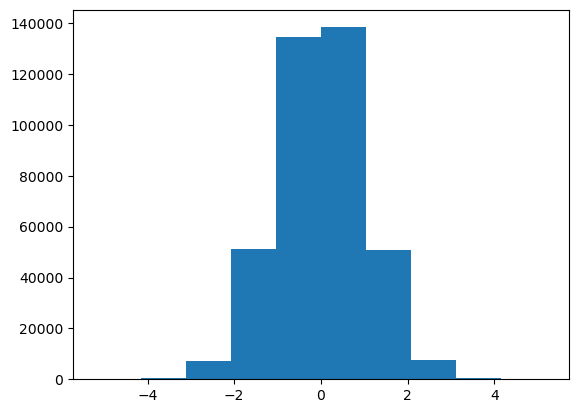

In [10]:
plt.hist(y_new)

In [11]:
y_new.shape

(390062,)

In [12]:
y_new = y_new.reshape(-1, 1)

In [13]:
label = df['FAULT']

In [14]:
label = label.values

In [15]:
import optuna

In [38]:
sr = agentic_modeling.StudyRunner()

TypeError: StudyRunner.__init__() missing 2 required positional arguments: 'objective' and 'cv'

In [39]:
agentic_modeling.optuna_objective

<function agentic_modeling.optuna_objective(trial, X, y, weights=None, n_splits=5)>

In [ ]:


study = optuna.create_study(direction="maximize", pruner=optuna.pruners.MedianPruner(n_startup_trials=5, n_warmup_steps=5))
study.optimize(lambda t: agentic_modeling.optuna_objective(t, y_new, label,
                  weights=weights, n_splits=5),
               n_trials=100)


print("Best score:", study.best_value)
print("Best config:", study.best_trial.params)
cfg = study.best_trial.user_attrs if "config" in study.best_trial.user_attrs else None

[I 2025-10-21 13:18:19,850] A new study created in memory with name: no-name-fe50feea-bd39-408b-a5ec-8cab05669468


In [17]:
import optuna

In [17]:
X, y = y_new, label

In [19]:
weights = {"accuracy": 0.1, "precision": 0.3, "recall": 0.3, "f1": 0.2, "roc_auc": 0.1}
study = optuna.create_study(direction="maximize",
                            pruner=optuna.pruners.MedianPruner(n_startup_trials=5, n_warmup_steps=5))
study.optimize(lambda t: agentic_modeling.optuna_objective(t, X, y, weights, n_splits=5), n_trials=50)
print("Best score (func):", study.best_value)
print("Best config (func):", study.best_trial.user_attrs["config"])

[I 2025-10-21 15:03:40,048] A new study created in memory with name: no-name-e8433ac3-93ea-4426-a51b-0cb8aa6108ab
d:\Anaconda\envs\ai-env-torch\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\skle

[TorchANN] epoch 001 train_loss=0.6312 val_loss=0.6103
[TorchANN] epoch 005 train_loss=0.5976 val_loss=0.5911
[TorchANN] epoch 010 train_loss=0.5931 val_loss=0.5875
[TorchANN] Stopping due to time budget (70s)


D:\Repositories\PhD\src\classes\agentic_modeling.py:136: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler_amp = torch.cuda.amp.GradScaler(enabled=self.use_amp)
D:\Repositories\PhD\src\classes\agentic_modeling.py:149: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=self.use_amp):
D:\Repositories\PhD\src\classes\agentic_modeling.py:169: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=self.use_amp):


[TorchANN] epoch 001 train_loss=0.6286 val_loss=0.6066


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(


[TorchANN] epoch 005 train_loss=0.5964 val_loss=0.5889


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(


[TorchANN] epoch 010 train_loss=0.5923 val_loss=0.5868


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 12 is already reported.
  warnings.warn(


[TorchANN] Stopping due to time budget (70s)


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(
D:\Repositories\PhD\src\classes\agentic_modeling.py:136: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler_amp = torch.cuda.amp.GradScaler(enabled=self.use_amp)
D:\Repositories\PhD\src\classes\agentic_modeling.py:149: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=self.use_amp):
D:\Repositories\PhD\src\classes\agentic_modeling.py:169: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=self.use_amp):


[TorchANN] epoch 001 train_loss=0.6315 val_loss=0.6127


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(


[TorchANN] epoch 005 train_loss=0.5977 val_loss=0.5924


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(


[TorchANN] epoch 010 train_loss=0.5921 val_loss=0.5883


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 12 is already reported.
  warnings.warn(


[TorchANN] Stopping due to time budget (70s)


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(
D:\Repositories\PhD\src\classes\agentic_modeling.py:136: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler_amp = torch.cuda.amp.GradScaler(enabled=self.use_amp)
D:\Repositories\PhD\src\classes\agentic_modeling.py:149: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=self.use_amp):
D:\Repositories\PhD\src\classes\agentic_modeling.py:169: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=self.use_amp):


[TorchANN] epoch 001 train_loss=0.6284 val_loss=0.6080


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(


[TorchANN] epoch 005 train_loss=0.5973 val_loss=0.5898


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(


[TorchANN] epoch 010 train_loss=0.5926 val_loss=0.5867


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 12 is already reported.
  warnings.warn(


[TorchANN] Stopping due to time budget (70s)


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(
D:\Repositories\PhD\src\classes\agentic_modeling.py:136: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler_amp = torch.cuda.amp.GradScaler(enabled=self.use_amp)
D:\Repositories\PhD\src\classes\agentic_modeling.py:149: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=self.use_amp):
D:\Repositories\PhD\src\classes\agentic_modeling.py:169: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=self.use_amp):


[TorchANN] epoch 001 train_loss=0.6296 val_loss=0.6094


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(


[TorchANN] epoch 005 train_loss=0.5978 val_loss=0.5925


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(


[TorchANN] epoch 010 train_loss=0.5934 val_loss=0.5892


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 12 is already reported.
  warnings.warn(


[TorchANN] Stopping due to time budget (70s)


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(
[I 2025-10-21 15:13:13,279] Trial 1 finished with value: 0.7181868948941992 and parameters: {'model_type': 'torch', 'torch_hidden': (64, 64, 32), 'torch_dropout': 0.06982188332306549, 'torch_lr': 0.0001468030511461997, 'torch_batch': 128, 'torch_epochs': 52, 'torch_patience': 6, 'torch_fit_seconds': 70}. Best is trial 1 with value: 0.7181868948941992.
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\distributions.py:518: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (128,) which is of type tuple.
  warnings.warn(message)
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\distributions.py:518: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persiste

[TorchANN] epoch 001 train_loss=0.6125 val_loss=0.5979
[TorchANN] Stopping due to time budget (38s)


D:\Repositories\PhD\src\classes\agentic_modeling.py:136: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler_amp = torch.cuda.amp.GradScaler(enabled=self.use_amp)
D:\Repositories\PhD\src\classes\agentic_modeling.py:149: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=self.use_amp):
D:\Repositories\PhD\src\classes\agentic_modeling.py:169: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=self.use_amp):


[TorchANN] epoch 001 train_loss=0.6124 val_loss=0.5988


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(


[TorchANN] Stopping due to time budget (38s)


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
D:\Repositories\PhD\src\classes\agentic_modeling.py:136: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler_amp = torch.cuda.amp.GradScaler(enabled=self.use_amp)
D:\Repositories\PhD\src\classes\agentic_modeling.py:149: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=self.use_amp):
D:\Repositories\PhD\src\classes\agentic_modeling.py:169: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=self.use_amp):


[TorchANN] epoch 001 train_loss=0.6133 val_loss=0.6003


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(


[TorchANN] Stopping due to time budget (38s)


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
D:\Repositories\PhD\src\classes\agentic_modeling.py:136: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler_amp = torch.cuda.amp.GradScaler(enabled=self.use_amp)
D:\Repositories\PhD\src\classes\agentic_modeling.py:149: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=self.use_amp):
D:\Repositories\PhD\src\classes\agentic_modeling.py:169: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=self.use_amp):


[TorchANN] epoch 001 train_loss=0.6136 val_loss=0.5964


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(


[TorchANN] Stopping due to time budget (38s)


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
D:\Repositories\PhD\src\classes\agentic_modeling.py:136: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler_amp = torch.cuda.amp.GradScaler(enabled=self.use_amp)
D:\Repositories\PhD\src\classes\agentic_modeling.py:149: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=self.use_amp):
D:\Repositories\PhD\src\classes\agentic_modeling.py:169: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=self.use_amp):


[TorchANN] epoch 001 train_loss=0.6119 val_loss=0.6010


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(


[TorchANN] Stopping due to time budget (38s)


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
[I 2025-10-21 15:19:39,196] Trial 4 finished with value: 0.7301524973988529 and parameters: {'model_type': 'torch', 'torch_hidden': (128, 64), 'torch_dropout': 0.41991038385017776, 'torch_lr': 0.003110692443194205, 'torch_batch': 32, 'torch_epochs': 61, 'torch_patience': 10, 'torch_fit_seconds': 38}. Best is trial 4 with value: 0.7301524973988529.
d:\Anaconda\envs\ai-env-torch\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\sklear

[TorchANN] epoch 001 train_loss=0.6007 val_loss=0.5927
[TorchANN] epoch 005 train_loss=0.5882 val_loss=0.5872
[TorchANN] epoch 010 train_loss=0.5863 val_loss=0.5836
[TorchANN] Stopping due to time budget (88s)


D:\Repositories\PhD\src\classes\agentic_modeling.py:136: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler_amp = torch.cuda.amp.GradScaler(enabled=self.use_amp)
D:\Repositories\PhD\src\classes\agentic_modeling.py:149: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=self.use_amp):
D:\Repositories\PhD\src\classes\agentic_modeling.py:169: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=self.use_amp):


[TorchANN] epoch 001 train_loss=0.6013 val_loss=0.5928


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(


[TorchANN] epoch 005 train_loss=0.5924 val_loss=0.5886


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(


[TorchANN] epoch 010 train_loss=0.5917 val_loss=0.5913


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(


[TorchANN] Stopping due to time budget (88s)


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(
D:\Repositories\PhD\src\classes\agentic_modeling.py:136: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler_amp = torch.cuda.amp.GradScaler(enabled=self.use_amp)
D:\Repositories\PhD\src\classes\agentic_modeling.py:149: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=self.use_amp):
D:\Repositories\PhD\src\classes\agentic_modeling.py:169: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=self.use_amp):


[TorchANN] epoch 001 train_loss=0.6012 val_loss=0.5948


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(


[TorchANN] epoch 005 train_loss=0.5902 val_loss=0.5896


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(


[TorchANN] epoch 010 train_loss=0.5878 val_loss=0.5857


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(


[TorchANN] Stopping due to time budget (88s)


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(
D:\Repositories\PhD\src\classes\agentic_modeling.py:136: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler_amp = torch.cuda.amp.GradScaler(enabled=self.use_amp)
D:\Repositories\PhD\src\classes\agentic_modeling.py:149: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=self.use_amp):
D:\Repositories\PhD\src\classes\agentic_modeling.py:169: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=self.use_amp):


[TorchANN] epoch 001 train_loss=0.6014 val_loss=0.5933


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(


[TorchANN] epoch 005 train_loss=0.5894 val_loss=0.5896


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(


[TorchANN] epoch 010 train_loss=0.5866 val_loss=0.5844


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(


[TorchANN] Stopping due to time budget (88s)


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(
D:\Repositories\PhD\src\classes\agentic_modeling.py:136: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler_amp = torch.cuda.amp.GradScaler(enabled=self.use_amp)
D:\Repositories\PhD\src\classes\agentic_modeling.py:149: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=self.use_amp):
D:\Repositories\PhD\src\classes\agentic_modeling.py:169: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=self.use_amp):


[TorchANN] epoch 001 train_loss=0.6006 val_loss=0.5952


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(


[TorchANN] epoch 005 train_loss=0.5949 val_loss=0.5971


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(


[TorchANN] epoch 010 train_loss=0.5923 val_loss=0.5941


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(


[TorchANN] Stopping due to time budget (88s)


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(
[I 2025-10-21 16:04:18,804] Trial 27 finished with value: 0.7372207016588541 and parameters: {'model_type': 'torch', 'torch_hidden': (64, 64, 32), 'torch_dropout': 0.0016029642110687303, 'torch_lr': 0.009136931442682393, 'torch_batch': 64, 'torch_epochs': 20, 'torch_patience': 12, 'torch_fit_seconds': 88}. Best is trial 22 with value: 0.7643048761015186.
d:\Anaconda\envs\ai-env-torch\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.


[TorchANN] epoch 001 train_loss=0.6314 val_loss=0.6064
[TorchANN] Stopping due to time budget (21s)


D:\Repositories\PhD\src\classes\agentic_modeling.py:136: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler_amp = torch.cuda.amp.GradScaler(enabled=self.use_amp)
D:\Repositories\PhD\src\classes\agentic_modeling.py:149: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=self.use_amp):
D:\Repositories\PhD\src\classes\agentic_modeling.py:169: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=self.use_amp):


[TorchANN] epoch 001 train_loss=0.6307 val_loss=0.6033


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(


[TorchANN] Stopping due to time budget (21s)


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
D:\Repositories\PhD\src\classes\agentic_modeling.py:136: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler_amp = torch.cuda.amp.GradScaler(enabled=self.use_amp)
D:\Repositories\PhD\src\classes\agentic_modeling.py:149: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=self.use_amp):
D:\Repositories\PhD\src\classes\agentic_modeling.py:169: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=self.use_amp):


[TorchANN] epoch 001 train_loss=0.6298 val_loss=0.6031


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(


[TorchANN] Stopping due to time budget (21s)


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
D:\Repositories\PhD\src\classes\agentic_modeling.py:136: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler_amp = torch.cuda.amp.GradScaler(enabled=self.use_amp)
D:\Repositories\PhD\src\classes\agentic_modeling.py:149: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=self.use_amp):
D:\Repositories\PhD\src\classes\agentic_modeling.py:169: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=self.use_amp):


[TorchANN] epoch 001 train_loss=0.6288 val_loss=0.6019


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(


[TorchANN] Stopping due to time budget (21s)


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
D:\Repositories\PhD\src\classes\agentic_modeling.py:136: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler_amp = torch.cuda.amp.GradScaler(enabled=self.use_amp)
D:\Repositories\PhD\src\classes\agentic_modeling.py:149: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=self.use_amp):
D:\Repositories\PhD\src\classes\agentic_modeling.py:169: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=self.use_amp):


[TorchANN] epoch 001 train_loss=0.6271 val_loss=0.6033


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(


[TorchANN] Stopping due to time budget (21s)


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
[I 2025-10-21 16:06:58,661] Trial 34 finished with value: 0.7115717263991745 and parameters: {'model_type': 'torch', 'torch_hidden': (128, 64), 'torch_dropout': 0.4618179236710348, 'torch_lr': 0.00024195850724950796, 'torch_batch': 32, 'torch_epochs': 80, 'torch_patience': 5, 'torch_fit_seconds': 21}. Best is trial 31 with value: 0.7661646172744876.
[I 2025-10-21 16:06:59,993] Trial 35 finished with value: 0.7658773416312146 and parameters: {'model_type': 'xgb', 'xgb_n': 108, 'xgb_depth': 5, 'xgb_lr': 0.002168601953242511, 'xgb_subsample': 0.8246863572044201, 'xgb_colsample': 0.8544216048994877}. Best is trial 31 with value: 0.7661646172744876.
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\distributions.py:518: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, f

[TorchANN] epoch 001 train_loss=0.6138 val_loss=0.5949
[TorchANN] epoch 005 train_loss=0.5948 val_loss=0.5871
[TorchANN] Stopping due to time budget (56s)


D:\Repositories\PhD\src\classes\agentic_modeling.py:136: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler_amp = torch.cuda.amp.GradScaler(enabled=self.use_amp)
D:\Repositories\PhD\src\classes\agentic_modeling.py:149: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=self.use_amp):
D:\Repositories\PhD\src\classes\agentic_modeling.py:169: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=self.use_amp):


[TorchANN] epoch 001 train_loss=0.6126 val_loss=0.5927


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(


[TorchANN] epoch 005 train_loss=0.5930 val_loss=0.5855


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(


[TorchANN] Stopping due to time budget (56s)


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(
D:\Repositories\PhD\src\classes\agentic_modeling.py:136: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler_amp = torch.cuda.amp.GradScaler(enabled=self.use_amp)
D:\Repositories\PhD\src\classes\agentic_modeling.py:149: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=self.use_amp):
D:\Repositories\PhD\src\classes\agentic_modeling.py:169: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=self.use_amp):


[TorchANN] epoch 001 train_loss=0.6129 val_loss=0.5960


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(


[TorchANN] epoch 005 train_loss=0.5945 val_loss=0.5892


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(


[TorchANN] Stopping due to time budget (56s)


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(
D:\Repositories\PhD\src\classes\agentic_modeling.py:136: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler_amp = torch.cuda.amp.GradScaler(enabled=self.use_amp)
D:\Repositories\PhD\src\classes\agentic_modeling.py:149: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=self.use_amp):
D:\Repositories\PhD\src\classes\agentic_modeling.py:169: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=self.use_amp):


[TorchANN] epoch 001 train_loss=0.6143 val_loss=0.5932


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(


[TorchANN] epoch 005 train_loss=0.5939 val_loss=0.5887


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(


[TorchANN] Stopping due to time budget (56s)


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(
D:\Repositories\PhD\src\classes\agentic_modeling.py:136: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler_amp = torch.cuda.amp.GradScaler(enabled=self.use_amp)
D:\Repositories\PhD\src\classes\agentic_modeling.py:149: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=self.use_amp):
D:\Repositories\PhD\src\classes\agentic_modeling.py:169: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=self.use_amp):


[TorchANN] epoch 001 train_loss=0.6145 val_loss=0.5988


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(


[TorchANN] epoch 005 train_loss=0.5956 val_loss=0.5887


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(


[TorchANN] Stopping due to time budget (56s)


d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\trial\_trial.py:501: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(
[I 2025-10-21 16:17:27,441] Trial 39 finished with value: 0.7289576414272431 and parameters: {'model_type': 'torch', 'torch_hidden': (64, 64, 32), 'torch_dropout': 0.2510725408232754, 'torch_lr': 0.0008622507647775949, 'torch_batch': 64, 'torch_epochs': 26, 'torch_patience': 8, 'torch_fit_seconds': 56}. Best is trial 31 with value: 0.7661646172744876.
d:\Anaconda\envs\ai-env-torch\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\Anaconda\envs\ai-env-torch\lib\site-packages\sk

Best score (func): 0.7661646172744876
Best config (func): {'model_type': 'xgb', 'params': {'n_estimators': 299, 'max_depth': 6, 'learning_rate': 0.001087140783306997, 'subsample': 0.9246377129193185, 'colsample_bytree': 0.9341779001580311}}
